In [1]:
import json
from tqdm import tqdm
import spacy
from spacy import displacy
import gensim
from climdist.data import load as data_load

In [6]:
# get the vectors
model = gensim.models.KeyedVectors.load_word2vec_format('../data/models/word2vec_270422/keyedvectors.txt')

In [8]:
# get the core weather events

with open('../pipeline/weather_events.json') as f:
    events = json.load(f)

In [11]:
eventslist = []
for lst in events.values():
    eventslist += lst

eventslist = [word.lower() for word in eventslist if model.has_index_for(word.lower())]

In [19]:
# func to iterate over the n most similar words to each "core event", giving the option to add them manually
# to the entity ruler patterns

def add_similar_patterns(model, eventslist, processed_words=None):
    
    if processed_words is None:
        processed_words = []
    patterns = []
    
    to_go = len(eventslist)
    
    for word in eventslist:
        
        similars = model.most_similar(word, topn=100)
        print('\n\n\n\n----', word, '----\n\n')
        
        for entry in similars:
            if entry[0] not in processed_words:
                print(entry[0])
                
                choice = 0
                while choice not in ['y', 'n', 'x', 'S']:
                    choice = input('Add? ')
                if choice == 'y':
                    patterns.append({'label': 'WEA', 'pattern': entry[0]})
                    processed_words.append(entry[0])
                elif choice == 'n':
                    processed_words.append(entry[0])
                    
        to_go -= 1
        if to_go%10 == 0:
            print(f'{to_go} more to go')               
                    
    return patterns

In [62]:
#patterns = add_similar_patterns(model, eventslist)





---- Wetter ----


Welter
Add? y
Witterung
Add? y
Herbstwetter
Add? y
Frühlingswetter
Add? y
Werter
Add? y
Regenwetter
Add? y
Wetters
Add? y
Sommerwetter
Add? y
FrühlingSwetter
Add? y
anhaltend
Add? n
Witteruug
Add? y
Winterwetter
Add? y
Winde
Add? y
regnerische
Add? n
Jahreszeit
Add? n
Regen
Add? y
sommerlich
Add? n
Maiwetter
Add? y
Witternng
Add? y
Winterbahn
Add? n
Nordwinde
Add? y
Regenschauern
Add? y
neblig
Add? n
WetterS
Add? y
regnerischen
Add? n
regnerisches
Add? n
Wintertag
Add? n
Regenschauer
Add? y
regnerisch
Add? n
unbeständige
Add? n
Windstillen
Add? y
Nordostwinde
Add? y
Schneegestöber
Add? y
winterlich
Add? n
Herbsttag
Add? n
Schlittenbahn
Add? n
Ostwinde
Add? y
nebelig
Add? n
Gewitterregen
Add? y
schneit
Add? n
Schneesall
Add? y
Regentag
Add? n
Wind
Add? y
Frostwetter
Add? y
regnete
Add? n
Südwinde
Add? y
Brise
Add? y
regnigte
Add? n
sonnig
Add? n
Thauwetter
Add? y
Nachtfröste
Add? y
windstille
Add? y
Sonnenschein
Add? y
Nordwestwinde
Add? y
Regentagen
Add? n
Herbst

Add? n
Schnee-
Add? y
Südwest-Wind
Add? y
Thauweiter
Add? y
Thauwettcr
Add? y
EiS
Add? n
Nachtfroste
Add? y
eintretendem
Add? n
Ostwindes
Add? y
Ostwinden
Add? y
EiSgang
Add? n
Reiffrost
Add? n
Treibeis
Add? n
Wintern
Add? 
Add? n
Seewind
Add? y
See-Eis
Add? n
Westwind
Add? y
Eisstoß
Add? n




---- Regen ----


Negen
Add? y
Rege
Add? y
Gewitter
Add? y
Stegen
Add? y
herabströmende
Add? n
Rebel
Add? y
Regeu
Add? y
Nebel
Add? y
Unwetter
Add? y
Hagelschauer
Add? y
Sturmwind
Add? y
Hagel
Add? y
feucht
Add? n
Niederschlag
Add? y
Regm
Add? y
bedeck
Add? n
Staubregen
Add? y
Gewittern
Add? y
Tbauwetter
Add? y
wolkenbruchartiger
Add? n
Traufe
Add? n
Witterun
Add? y
Sprühregen
Add? n
Windstößen
Add? y




---- Regens ----


Schneegestöbers
Add? y
Gewitterregens
Add? y
SchneeS
Add? y
Platzregens
Add? y
Gewitters
Add? y
Schneewehen
Add? y
langanhaltenden
Add? n
Schneemaffen
Add? n
Thauwetters
Add? y
niedergegangen
Add? n
Wolkenbruch
Add? y
Schneesturme
Add? y
angeschwellt
Add? n
Gedränges
Add? n
S





---- Tau ----


Kabeltau
Add? n
Taue
Add? n
Floß
Add? n
Boot
Add? n
Harpune
Add? n
Stricke
Add? n
Seil
Add? n
Nachen
Add? n
Jolle
Add? n
Boote
Add? x

49 more entries to go




---- Thau ----


ausgedörrte
Add? n
entblättert
Add? n
nasses
Add? n
verwelkt
Add? n
verdorrt
Add? n
Mittagssonne
Add? n
staubig
Add? n
wärmende
Add? n
Traube
Add? n
scharren
Add? n
naffen
Add? n
Tbau
Add? y
Abendluft
Add? n
seucht
Add? n
benetzten
Add? n
Grashalm
Add? n
Kachelofen
Add? n
Moos
Add? n
süßem
Add? n
feuchten
Add? n
erquickender
Add? n
kühles
Add? n
Nesseln
Add? n
nasse
Add? n
duftet
Add? n
Faulbaum
Add? n
Sonnenstrahl
Add? n
welk
Add? n
BaumeS
Add? n
Moo
Add? x

48 more entries to go




---- Tauwetter ----


West-Wind
Add? y
Eiterabsonderung
Add? n
NO.-Wind
Add? y
Abströmung
Add? n
Südwindes
Add? y
herrschendem
Add? n
Fieberzustand
Add? n
Frühlingswitterung
Add? n
Nachtsrost
Add? y
Drüsengeschwulst
Add? n
Schlingbeschwerden
Add? n
Nord-Westwind
Add? y
Frühlingsanfang
Add? n
Luftströme
Add? n
S

Add? n
südwestlichem
Add? n
dewölkt
Add? n
Sturmwarnung
Add? n
varomete
Add? n
Dorm
Add? n
östlichem
Add? n
MoraenS.
Add? n
Süd-Wind
Add? y
südöstlichem
Add? n
Arometer
Add? n




---- Westwind ----


SO.-Wind
Add? y




---- Nordwestwind ----


Karometer
Add? n
Bormitt
Add? n
-Wind
Add? y
varomerer
Add? n
Voldcraa
Add? n
Barometerstande
Add? n
29—13.
Add? n
Witterungsbeobachtungcn
Add? n
DomeSnces
Add? n




---- Nordwind ----






---- Nordostwind ----






---- Ostwind ----


Lyserort
Add? n
Seegalt
Add? n




---- Südostwind ----


Tomesnees
Add? S


Processed words: ['Welter', 'Witterung', 'Herbstwetter', 'Frühlingswetter', 'Werter', 'Regenwetter', 'Wetters', 'Sommerwetter', 'FrühlingSwetter', 'anhaltend', 'Witteruug', 'Winterwetter', 'Winde', 'regnerische', 'Jahreszeit', 'Regen', 'sommerlich', 'Maiwetter', 'Witternng', 'Winterbahn', 'Nordwinde', 'Regenschauern', 'neblig', 'WetterS', 'regnerischen', 'regnerisches', 'Wintertag', 'Regenschauer', 'regnerisch', 'unbeständige', 'Wind

In [20]:
#patterns_new = add_similar_patterns(model, eventslist)





---- wetter ----


witterung
Add? y
wetters
Add? y
herbstwetter
Add? y
regenwetter
Add? y
schöne_wetter
Add? y
welter
Add? y
frühlingswetter
Add? y
schönem_wetter
Add? y
jahreszeit
Add? n
anhaltend
Add? n
winterwetter
Add? y
regnerische
Add? n
warmes_wetter
Add? y
sommerwetter
Add? y
kalte_witterung
Add? y
regentag
Add? y
witteruug
Add? y
wetter_schön
Add? y
nebeligen
Add? n
regnerischen
Add? n
nordwinde
Add? y
neblig
Add? n
warme_witterung
Add? y
wetter_begünstigt
Add? y
witternng
Add? y
winde
Add? y
windstillen
Add? y
wind
Add? y
wetter_günstig
Add? y
schneegestöber
Add? y
regenschauer
Add? y
sonnenschein
Add? y
regen
Add? y
maiwetter
Add? y
schönes_wetter
Add? y
himmel_bewölkt
Add? y
sommerlich
Add? n
schneit
Add? n
regnerisch
Add? n
strengen_winter
Add? n
regenschauern
Add? y
wintertag
Add? n
schlechte_wetter
Add? y
schönste_wetter
Add? y
wind_wetter
Add? y
günstige_witterung
Add? y
grad_kälte
Add? y
herbsttage
Add? n
herbstwitterung
Add? y
nachsommer
Add? n
witterung_anhaltend

dynamo-maschine
Add? n
bewölkung
Add? n
chlorkalium
Add? n
verdampfung
Add? n
ueberdruck
Add? n
oxydirt
Add? n
grad_bewölkung
Add? y
durchlässigkeit
Add? n
kubikinhalt
Add? n
schichtung
Add? n
cubikzoll
Add? n
cylinders
Add? n
peratur
Add? y
verdichtung
Add? n
chlormagnesium
Add? n
schmelzpunkt
Add? n
millimetern
Add? n
luftleeren
Add? n
isobaren
Add? n
polarisation
Add? n
verdichtete
Add? n
dampfspannung
Add? n
durchmesser_zoll
Add? n
pendels
Add? n
wasserräder
Add? n
speisewasser
Add? n
erdatmosphäre
Add? n
leitungsfähigkeit
Add? n
pferdekräfte
Add? n
fadens
Add? n
heizungen
Add? n
rotirende
Add? n
luftdruck
Add? y
kohlenspitzen
Add? n
glasplatte
Add? n
tragkraft
Add? n
lichtquelle
Add? n
rotirenden
Add? n
dynamometer
Add? n
constructionstheile
Add? n
millimeter
Add? n
kalkerde
Add? n
chlornatrium
Add? n
wasserdruck
Add? n
lustdruck
Add? y
wandungen
Add? n
verticale
Add? n
nebensonnen
Add? n
cohäsion
Add? n
minimale
Add? n
diameter
Add? n
sphärischen
Add? n
elektrophor
Add? n
thermom

Add? n
teiges
Add? n
dextrin
Add? n
wismuth
Add? n
wassergehaltes
Add? n
abfließenden
Add? n
rohprotein
Add? n
aetzkalk
Add? 
Add? n
einpflügen
Add? n
moosdecke
Add? n
destillate
Add? n
tropfbar
Add? n
humoser
Add? n
extractstoffe
Add? n
cels
Add? n
rohfaser
Add? n
auslaugung
Add? n
verdünnt
Add? n
weinsäure
Add? n
salzhaltigen
Add? n
eingepflügt
Add? n
säurepulver
Add? n
verdampft
Add? n
schweflige
Add? n
gasentwickelung
Add? n
lufttrockenen
Add? n
gefror
Add? n
phosphorsauren
Add? n
kohlensaures
Add? n
schwefelhaltigen
Add? n
käsestoff
Add? n
wassermenge
Add? n
schwefelsaurem
Add? n
alkoholgehalt
Add? n
salzigem
Add? n
ausströmenden
Add? n
wasserdämpfe
Add? n
chlorcalcium
Add? n
destillirten
Add? n
reservoiren
Add? n
kreatinin
Add? n
strohstreu
Add? n
wasserdämpfen
Add? n
verdunstete
Add? n
düngemittels
Add? n
brandsporen
Add? n
anfeuchtung
Add? n
entströmende
Add? n
uebergießen
Add? n
trockensubstanz
Add? n
ablagert
Add? n
kalium
Add? n
ratron
Add? n
kohlenoxydgas
Add? n




---- re

Add? n
gefrorener
Add? n
erstickende
Add? n
umhergeschleudert
Add? n
hagelschlage
Add? y
heftigerem
Add? n
sortgeschwemmt
Add? n
stoßweise
Add? n
wellenförmige
Add? n
langanhaltenden
Add? n
staubwolken
Add? n




---- hagelschlag ----


waldbrände
Add? y
feuersbrünsten
Add? n
beimgesucht
Add? n
augerichtet
Add? n
wassersnoth
Add? n
heuschreckenschwärme
Add? n
brände
Add? n
brandunglück
Add? n
getreidekäfer
Add? n
feuersdrünste
Add? n
überschwemmungen
Add? y
feuersbrünfte
Add? n
feuersbrünste
Add? n
zieselmäuse
Add? n
viehsterben
Add? n
ueberfchwemmung
Add? y
verheerende
Add? n
verwüstungen
Add? n
brandschaden
Add? n
sehoden
Add? n
gewüthet
Add? n
feuerschäden
Add? n
verheerendsten
Add? n
viehseuche
Add? n
ssimbirsk
Add? n
brand-unglück
Add? n
heerungen
Add? n
viehbestand
Add? n
ueberschwem
Add? y
wanderheuschrecke
Add? n
ueberschwcmmung
Add? y




---- gewitter ----


ungewitter
Add? y
gewitterwolken
Add? y
donnerschläge
Add? y
sturmwetter
Add? y
ältesten_leute
Add? n
erdstößen
Add? n


dunkelheit_nacht
Add? n
gefechtes
Add? n
erplofion
Add? n




---- sturmwind ----


brausen
Add? n
wirbelnd
Add? n
tosen
Add? n
rauchsäulen
Add? n
gekrache
Add? n
peitschte
Add? n
feuerstrom
Add? n
braust
Add? n
brausend
Add? n
haushoch
Add? n
prasseln
Add? n
blitzen
Add? n
zerplatzte
Add? n
zischend
Add? n
sausen
Add? n
feuersäule
Add? n
dichten_massen
Add? n
anschwellende
Add? n
brausende
Add? n




---- tornado ----


mersey
Add? n
kaperschiff
Add? n
hecla
Add? n
segelnde
Add? n
shenandoah
Add? n
medway
Add? n
deerhound
Add? n
englische_brigg
Add? n
ankert
Add? n
sloop
Add? n
bermuda
Add? n
eharleston
Add? n
dampier
Add? n
auswandererschiff
Add? n
bulldog
Add? n
absegelte
Add? n
sclavenfahrer
Add? n
nothsignale
Add? n
geankert
Add? n
geyser
Add? n
huascar
Add? n
kausfahrer
Add? n
konvoy
Add? n
kriegsdampfschiff
Add? n
segelnden
Add? n
dragon
Add? n
porcupine
Add? n
steamers
Add? n
cormorant
Add? n
cyane
Add? n
steuerbordseite
Add? n
kearsage
Add? n
kreuzende
Add? n
tallahassee
Add? 

In [36]:
def review_patterns(patterns):
    
    cleaned = []
    
    for entry in patterns:
        print(entry['pattern'])
                
        choice = 0
        while choice not in ['y', 'n', 'x', 'S']:
            choice = input('Keep? ')
        if choice == 'y':
            cleaned.append({'label': 'WEA', 'pattern': entry['pattern']})
        elif choice == 'n':
            pass
        
    return cleaned

In [39]:
reviewed_patterns = review_patterns(patterns_new)

witterung
Keep? y
wetters
Keep? y
herbstwetter
Keep? y
regenwetter
Keep? y
schöne_wetter
Keep? y
welter
Keep? y
frühlingswetter
Keep? y
schönem_wetter
Keep? y
winterwetter
Keep? y
warmes_wetter
Keep? y
sommerwetter
Keep? y
kalte_witterung
Keep? y
regentag
Keep? y
witteruug
Keep? y
wetter_schön
Keep? y
nordwinde
Keep? y
warme_witterung
Keep? y
wetter_begünstigt
Keep? y
witternng
Keep? y
winde
Keep? y
windstillen
Keep? y
wind
Keep? y
wetter_günstig
Keep? y
schneegestöber
Keep? y
regenschauer
Keep? y
sonnenschein
Keep? y
regen
Keep? y
maiwetter
Keep? y
schönes_wetter
Keep? y
himmel_bewölkt
Keep? y
regenschauern
Keep? y
schlechte_wetter
Keep? y
schönste_wetter
Keep? y
wind_wetter
Keep? y
günstige_witterung
Keep? y
grad_kälte
Keep? y
herbstwitterung
Keep? y
witterung_anhaltend
Keep? y
frost_schnee
Keep? y
nordwind
Keep? y
gewitterregen
Keep? y
frost
Keep? y
schönsten_wetter
Keep? y
kälte_grad
Keep? y
sonnenhellen
Keep? y
schlechtes_wetter
Keep? y
froste
Keep? y
nachtfröste
Keep? y
westwind


uebcrschwemmung
Keep? y
schwemmung
Keep? y
ueberschwemmuugen
Keep? y
ueberfchwemmungen
Keep? y
schwemmungen
Keep? y
ueberschwcmmungen
Keep? y


In [60]:
removals = ['südwest', 'grad_reaumur', 'dürres', 'waldbrand', 'temperatur']
additions = ['schneedecke', 'staubregen', 'naturereignis', 'gewölke', 'flnth',
             'anprall', 'wasserhosen', 'fluthen', 'seesturm', 'klarer_himmel']

final_patterns = list(set([entry['pattern'] for entry in reviewed_patterns] + eventslist + additions))
final_patterns = [word for word in final_patterns if word not in removals]

In [61]:
with open('../pipeline/ner/ruler_patterns_300422.json', 'w', encoding='utf8') as f:
    json.dump(final_patterns, f)

In [79]:
pd.DataFrame(index=sorted(final_patterns)).to_excel('../pipeline/ner/ruler_patterns.xlsx')

In [80]:
patterns_df = pd.read_excel('../pipeline/ner/ruler_patterns.xlsx')

In [90]:
from itertools import chain

set(sorted(list(chain.from_iterable([word.split(';') for word in patterns_df.phenomenon.unique()]))))

{'dürre',
 'fluth',
 'frost',
 'gewitter',
 'hagel',
 'heiter',
 'hitze',
 'kalte',
 'klima',
 'kälte',
 'kühle',
 'naturereignis',
 'nebel',
 'niederschlag',
 'nordlichter',
 'orkan',
 'regen',
 'schnee',
 'sonnenschein',
 'sturm',
 'tau',
 'tornado',
 'warm',
 'wasserhose',
 'wetter',
 'wind',
 'windhose',
 'wirbelwind',
 'witterung',
 'wolken',
 'wärme',
 'überschwemmung'}

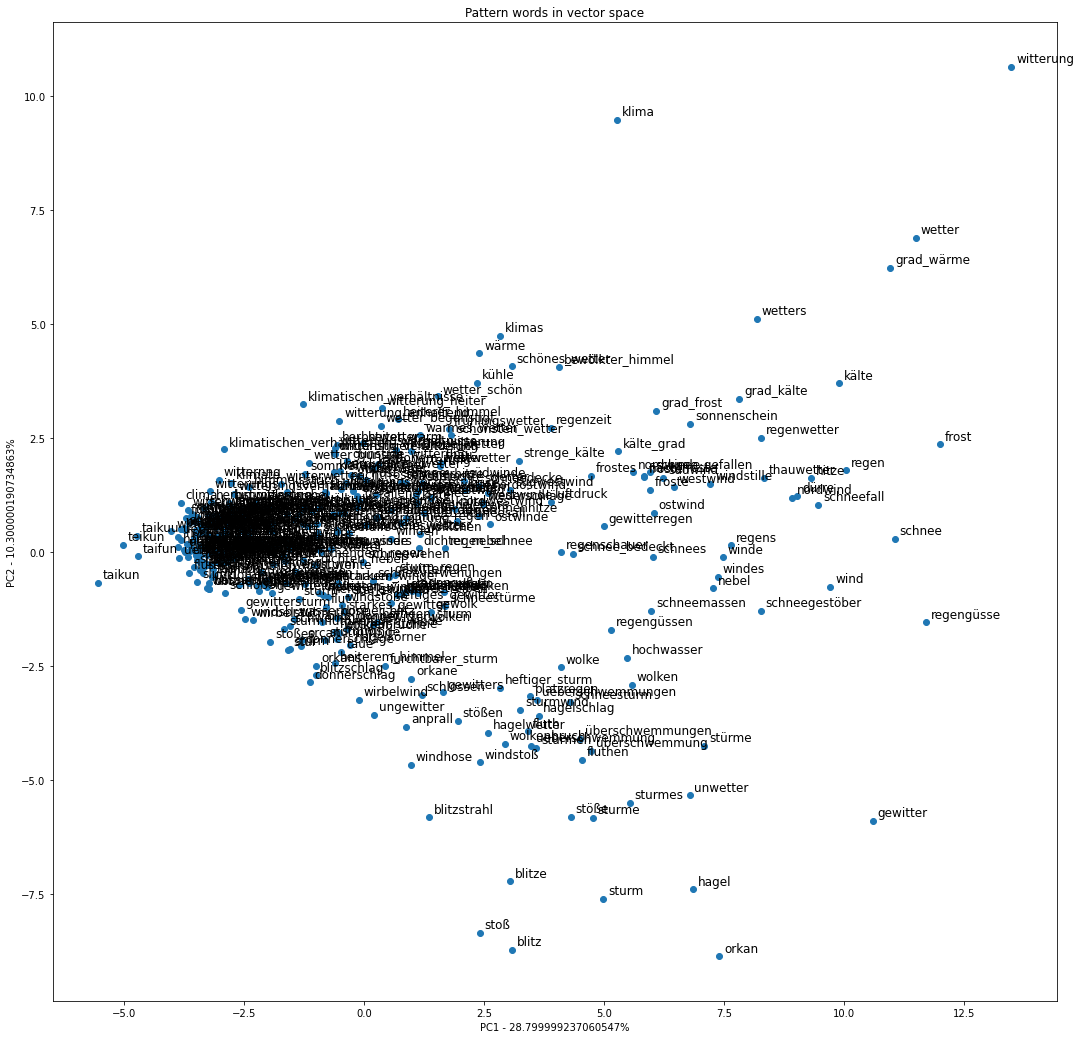

In [66]:
## PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import pandas as pd
import copy

pca_patterns = copy.deepcopy(final_patterns)
np.random.shuffle(pca_patterns)

df_data = {word: list(model[word]) for word in pca_patterns}
df = pd.DataFrame(df_data).transpose()
df.head()

# from: https://www.youtube.com/watch?v=Lsue2gEM9D0

pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# plt.figure(figsize=(18,6))
# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal Component')
# plt.title('Scree Plot')
# plt.show()

pca_df = pd.DataFrame(data=pca_data, index=df.index, columns=labels)

plt.figure(figsize=(18,18))

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Pattern words in vector space')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample]+0.1, pca_df.PC2.loc[sample]+0.1), size=12)
    
plt.show()

c:\users\krister\climdist\v_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\krister\climdist\v_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


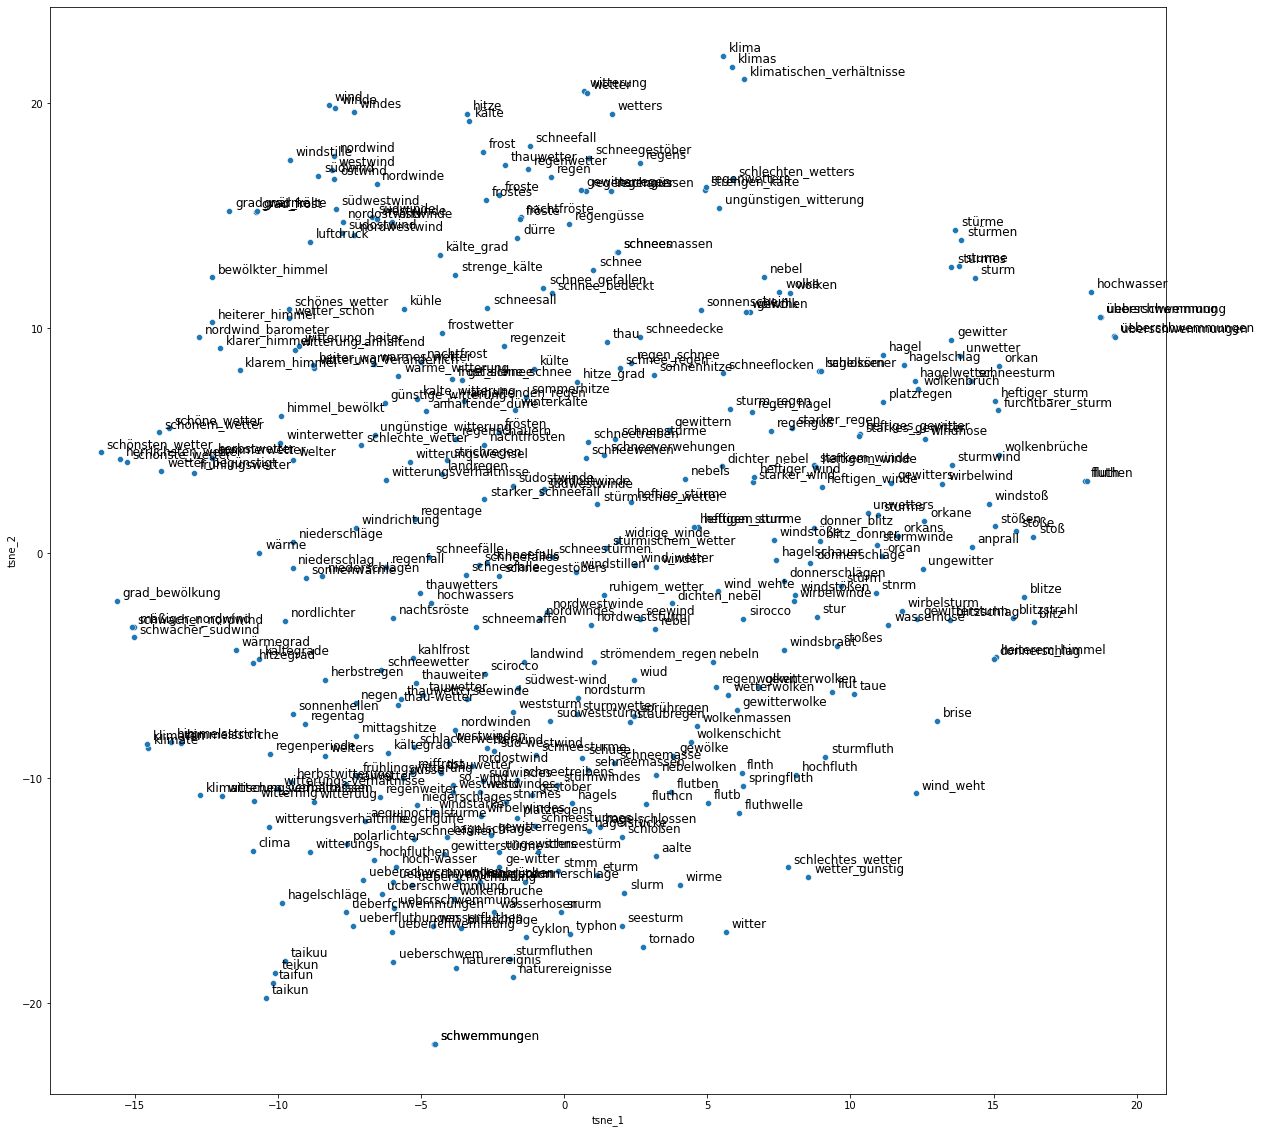

In [75]:
from sklearn.manifold import TSNE
import seaborn as sns

def tsne_plot():

    df_data = {word: list(model[word]) for word in pca_patterns}
    df = pd.DataFrame(df_data).transpose()
    
    tsne = TSNE(2)
    tsne_result = tsne.fit_transform(df)
    tsne_result_df = pd.DataFrame(
        {'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': df.index}
    )
    
    #tsne_result_df['period'] = tsne_result_df['label'].apply(lambda x: 2 if '2' in x else 1)
    
    plt.figure(figsize=(20,20))
    sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2')
    
    for ix, row in tsne_result_df.iterrows():
        if '_2' in row['label']:
            plt.annotate(row['label'], (row['tsne_1']+0.2, row['tsne_2']+0.2), size=12, color='red')
        elif '_1' in row['label']:
            plt.annotate(row['label'], (row['tsne_1']+0.2, row['tsne_2']+0.2), size=12, color='blue')
        else:
            plt.annotate(row['label'], (row['tsne_1']+0.2, row['tsne_2']+0.2), size=12)
    
    plt.show()
    
tsne_plot()

c:\users\krister\climdist\v_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\krister\climdist\v_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No handles with labels found to put in legend.


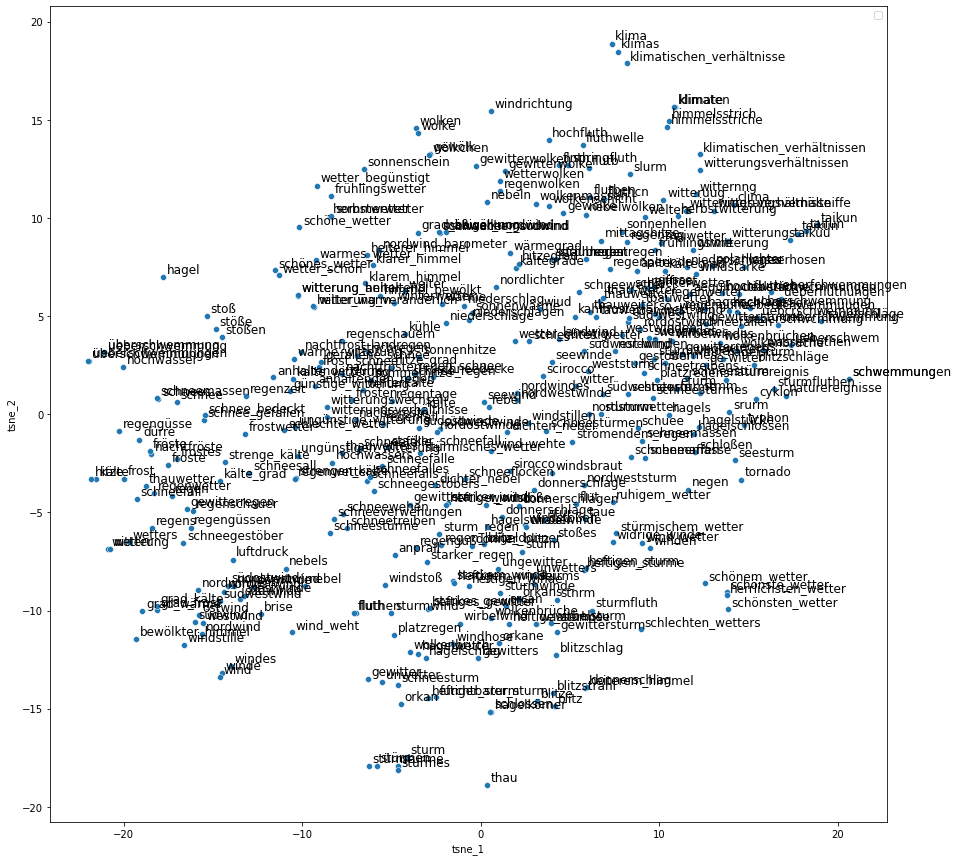